Red points (Up-regulated genes): 1863
Blue points (Down-regulated genes): 2442


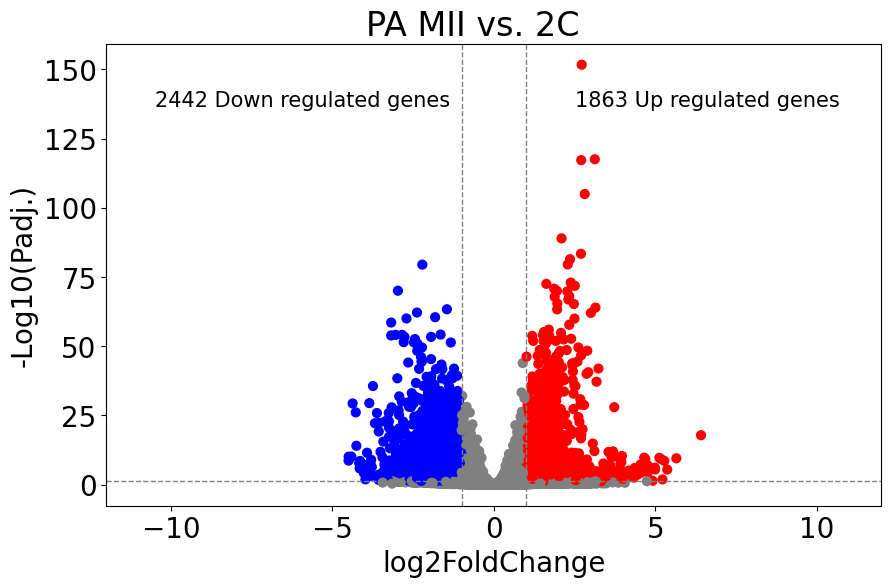

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
file_path = 'PA_mii_vs_2c.txt'  # 请确保文件路径正确
data = pd.read_csv(file_path, sep='\t')

# 计算 -log10(pvalue)
data['-log10(pvalue)'] = -np.log10(data['padj'])

# 设置颜色条件
def color_condition(row):
    if row['padj'] >= 0.05:
        return 'grey'
    elif row['padj'] < 0.05 and row['log2FoldChange'] > 1:
        return 'red'
    elif row['padj'] < 0.05 and row['log2FoldChange'] < -1:
        return 'blue'
    else:
        return 'grey'

data['color'] = data.apply(color_condition, axis=1)

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 绘制火山图
plt.figure(figsize=(10, 6))
plt.scatter(data['log2FoldChange'], data['-log10(pvalue)'], c=data['color'], s=40)

# 添加辅助线
plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=1, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-1, color='grey', linestyle='--', linewidth=1)
# 设置x轴范围
plt.xlim(-12, 12)  # 根据需要调整范围

# 添加文本注释
plt.text(-10.5, max(data['-log10(pvalue)']) * 0.9, '2442 Down regulated genes', horizontalalignment='left', color='black', fontsize=15)
plt.text(2.5, max(data['-log10(pvalue)']) * 0.9, '1863 Up regulated genes', horizontalalignment='left', color='black', fontsize=15)

# 设置标签
plt.title('PA MII vs. 2C    ')
plt.xlabel('log2FoldChange')
plt.ylabel('-Log10(Padj.)')

# 计算红点和蓝点的数量
red_points_count = data[data['color'] == 'red'].shape[0]
blue_points_count = data[data['color'] == 'blue'].shape[0]

# 打印结果
print(f"Red points (Up-regulated genes): {red_points_count}")
print(f"Blue points (Down-regulated genes): {blue_points_count}")

plt.savefig('PA_MII_2C_volcano.svg', dpi=300, bbox_inches='tight', transparent=True)


Red points (Up-regulated genes): 3832
Blue points (Down-regulated genes): 2017


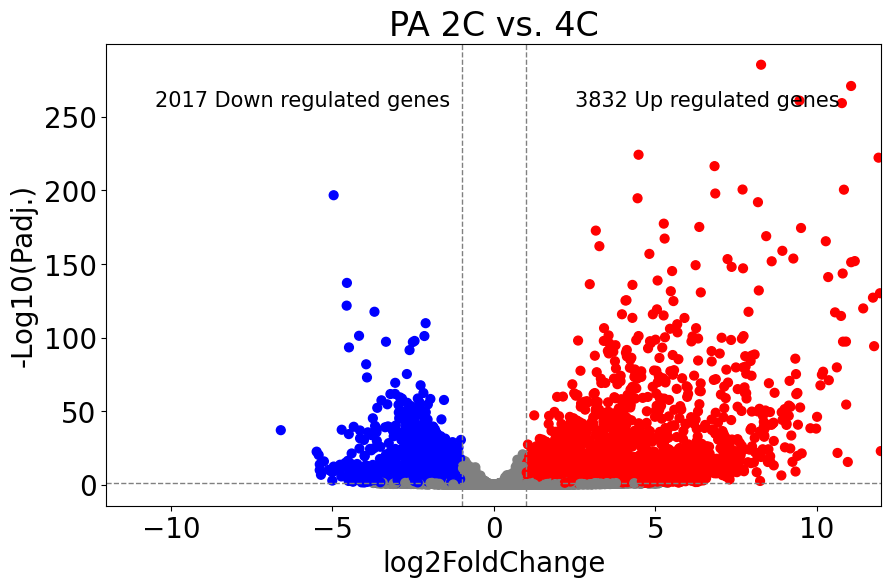

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
file_path = 'PA_2c_vs_4c.txt'  # 请确保文件路径正确
data = pd.read_csv(file_path, sep='\t')

# 计算 -log10(pvalue)
data['-log10(pvalue)'] = -np.log10(data['padj'].replace(0, np.nan))  # 避免 -log10(0) 的错误

# 设置颜色条件
def color_condition(row):
    if row['padj'] >= 0.05:
        return 'grey'
    elif row['padj'] < 0.05 and row['log2FoldChange'] > 1:
        return 'red'
    elif row['padj'] < 0.05 and row['log2FoldChange'] < -1:
        return 'blue'
    else:
        return 'grey'

data['color'] = data.apply(color_condition, axis=1)

# 删除无效行
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['log2FoldChange', '-log10(pvalue)'])

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 绘制火山图
plt.figure(figsize=(10, 6))
plt.scatter(data['log2FoldChange'], data['-log10(pvalue)'], c=data['color'], s=40)

# 添加辅助线
plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=1, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-1, color='grey', linestyle='--', linewidth=1)

# 确保注释时坐标有效
if len(data) > 0 and not data['-log10(pvalue)'].isna().all():
    max_value = max(data['-log10(pvalue)'])
else:
    max_value = 0

# 添加文本注释
plt.text(-10.5, max_value * 0.9, '2017 Down regulated genes', horizontalalignment='left', color='black', fontsize=15)
plt.text(2.5, max_value * 0.9, '3832 Up regulated genes', horizontalalignment='left', color='black', fontsize=15)

# 设置标签
plt.title('PA 2C vs. 4C')
plt.xlabel('log2FoldChange')
plt.ylabel('-Log10(Padj.)')
plt.xlim(-12, 12)  # 根据需要调整范围
# 计算红点和蓝点的数量
red_points_count = data[data['color'] == 'red'].shape[0]
blue_points_count = data[data['color'] == 'blue'].shape[0]

# 打印结果
print(f"Red points (Up-regulated genes): {red_points_count}")
print(f"Blue points (Down-regulated genes): {blue_points_count}")

plt.savefig('PA_2C_4C_volcano.svg', dpi=300, bbox_inches='tight', transparent=True)



Red points (Up-regulated genes): 90
Blue points (Down-regulated genes): 120


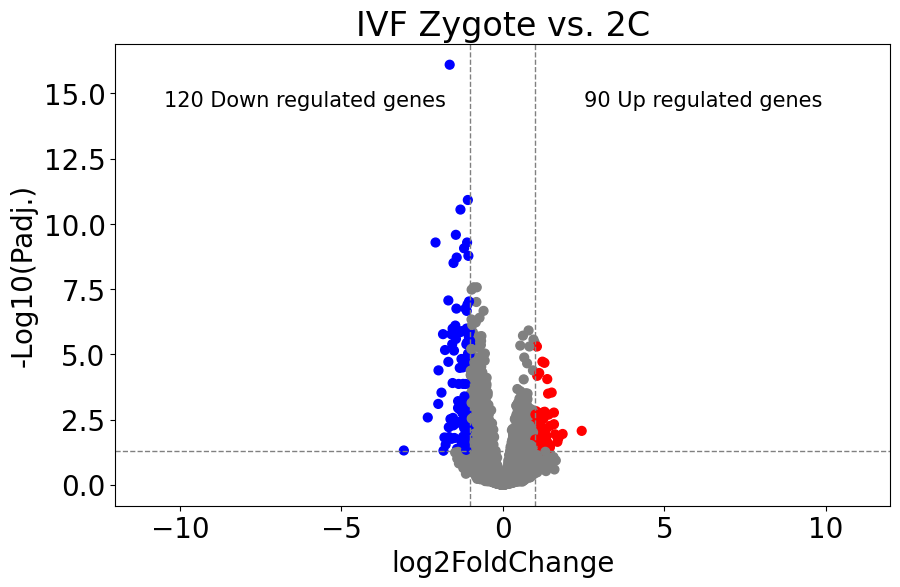

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
file_path = 'IVF_zygote_vs_2c.txt'  # 请确保文件路径正确
data = pd.read_csv(file_path, sep='\t')

# 计算 -log10(pvalue)
data['-log10(pvalue)'] = -np.log10(data['padj'].replace(0, np.nan))  # 避免 -log10(0) 的错误

# 设置颜色条件
def color_condition(row):
    if row['padj'] >= 0.05:
        return 'grey'
    elif row['padj'] < 0.05 and row['log2FoldChange'] > 1:
        return 'red'
    elif row['padj'] < 0.05 and row['log2FoldChange'] < -1:
        return 'blue'
    else:
        return 'grey'

data['color'] = data.apply(color_condition, axis=1)

# 删除无效行
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['log2FoldChange', '-log10(pvalue)'])

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 绘制火山图
plt.figure(figsize=(10, 6))
plt.scatter(data['log2FoldChange'], data['-log10(pvalue)'], c=data['color'], s=40)

# 添加辅助线
plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=1, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-1, color='grey', linestyle='--', linewidth=1)

# 确保注释时坐标有效
if len(data) > 0 and not data['-log10(pvalue)'].isna().all():
    max_value = max(data['-log10(pvalue)'])
else:
    max_value = 0

# 添加文本注释
plt.text(-10.5, max_value * 0.9, '120 Down regulated genes', horizontalalignment='left', color='black', fontsize=15)
plt.text(2.5, max_value * 0.9, '90 Up regulated genes', horizontalalignment='left', color='black', fontsize=15)

# 设置标签
plt.title('IVF Zygote vs. 2C')
plt.xlabel('log2FoldChange')
plt.ylabel('-Log10(Padj.)')
plt.xlim(-12, 12)  # 根据需要调整范围
# 计算红点和蓝点的数量
red_points_count = data[data['color'] == 'red'].shape[0]
blue_points_count = data[data['color'] == 'blue'].shape[0]

# 打印结果
print(f"Red points (Up-regulated genes): {red_points_count}")
print(f"Blue points (Down-regulated genes): {blue_points_count}")

plt.savefig('IVF_Zygote_2C_volcano.svg', dpi=300, bbox_inches='tight', transparent=True)


Red points (Up-regulated genes): 3331
Blue points (Down-regulated genes): 2653


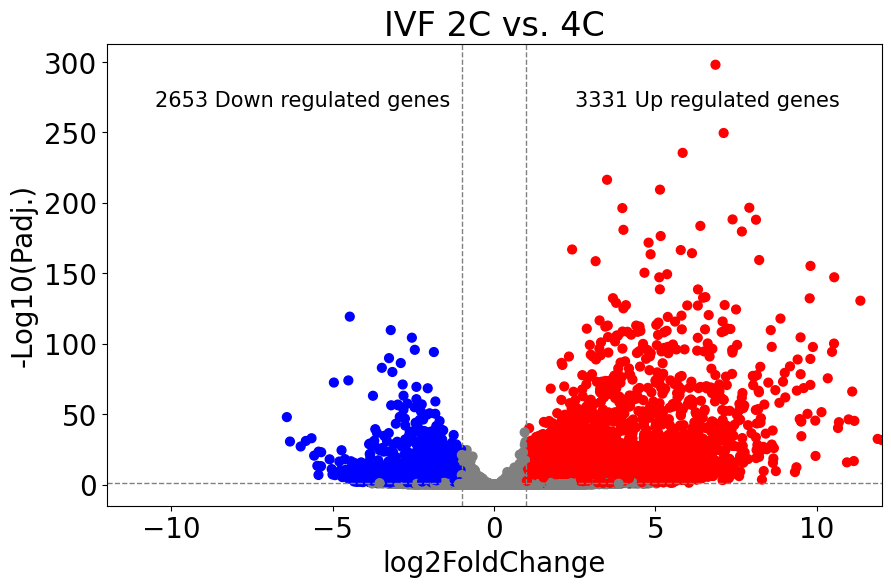

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG, display

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 读取数据
file_path = 'IVF_2c_vs_4c.txt'  # 请确保文件路径正确
data = pd.read_csv(file_path, sep='\t')

# 计算 -log10(pvalue)
data['-log10(pvalue)'] = -np.log10(data['padj'].replace(0, np.nan))  # 避免 -log10(0) 的错误

# 设置颜色条件
def color_condition(row):
    if row['padj'] >= 0.05:
        return 'grey'
    elif row['padj'] < 0.05 and row['log2FoldChange'] > 1:
        return 'red'
    elif row['padj'] < 0.05 and row['log2FoldChange'] < -1:
        return 'blue'
    else:
        return 'grey'

data['color'] = data.apply(color_condition, axis=1)

# 删除无效行
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['log2FoldChange', '-log10(pvalue)'])

# 设置全局字体大小
plt.rcParams.update({'font.size': 20})

# 绘制火山图
plt.figure(figsize=(10, 6))
plt.scatter(data['log2FoldChange'], data['-log10(pvalue)'], c=data['color'], s=40)

# 添加辅助线
plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--', linewidth=1)
plt.axvline(x=1, color='grey', linestyle='--', linewidth=1)
plt.axvline(x=-1, color='grey', linestyle='--', linewidth=1)

# 确保注释时坐标有效
if len(data) > 0 and not data['-log10(pvalue)'].isna().all():
    max_value = max(data['-log10(pvalue)'])
else:
    max_value = 0

# 添加文本注释
plt.text(-10.5, max_value * 0.9, '2653 Down regulated genes', horizontalalignment='left', color='black', fontsize=15)
plt.text(2.5, max_value * 0.9, '3331 Up regulated genes', horizontalalignment='left', color='black', fontsize=15)

# 设置标签
plt.title('IVF 2C vs. 4C')
plt.xlabel('log2FoldChange')
plt.ylabel('-Log10(Padj.)')
plt.xlim(-12, 12)  # 根据需要调整范围
# 计算红点和蓝点的数量
red_points_count = data[data['color'] == 'red'].shape[0]
blue_points_count = data[data['color'] == 'blue'].shape[0]

# 打印结果
print(f"Red points (Up-regulated genes): {red_points_count}")
print(f"Blue points (Down-regulated genes): {blue_points_count}")

plt.savefig('IVF_2C_4C_volcano.svg', dpi=300, bbox_inches='tight', transparent=True)
